In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('Titanic-Dataset.csv') 

In [40]:
print(df.head())           

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [41]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [42]:
print(df.describe())   

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [43]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [44]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [45]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [46]:
df.drop(columns=['Cabin'], inplace=True)

In [47]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Embarked  
0         A/5 21171   7.2500        S  
1          PC 17599  71.2833        C  
2  STON/O2. 3101282   7.9250        S  
3            113803  53.1000        S  
4            373450   8.0500        S  


In [48]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [49]:
from sklearn.preprocessing import StandardScaler


In [50]:
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print(df.describe())




       PassengerId    Survived      Pclass         Sex           Age  \
count   891.000000  891.000000  891.000000  891.000000  8.910000e+02   
mean    446.000000    0.383838    2.308642    0.352413  2.272780e-16   
std     257.353842    0.486592    0.836071    0.477990  1.000562e+00   
min       1.000000    0.000000    1.000000    0.000000 -2.224156e+00   
25%     223.500000    0.000000    2.000000    0.000000 -5.657365e-01   
50%     446.000000    0.000000    3.000000    0.000000 -1.046374e-01   
75%     668.500000    1.000000    3.000000    1.000000  4.333115e-01   
max     891.000000    1.000000    3.000000    1.000000  3.891554e+00   

              SibSp         Parch          Fare  
count  8.910000e+02  8.910000e+02  8.910000e+02  
mean   4.386066e-17  5.382900e-17  3.987333e-18  
std    1.000562e+00  1.000562e+00  1.000562e+00  
min   -4.745452e-01 -4.736736e-01 -6.484217e-01  
25%   -4.745452e-01 -4.736736e-01 -4.891482e-01  
50%   -4.745452e-01 -4.736736e-01 -3.573909e-01  
7

In [51]:
df[num_cols].head()


,Age,Fare,SibSp,Parch
0,-0.565736,-0.502445,0.432793,-0.473674
1,0.663861,0.786845,0.432793,-0.473674
2,-0.258337,-0.488854,-0.474545,-0.473674
3,0.433312,0.420730,0.432793,-0.473674
4,0.433312,-0.486337,-0.474545,-0.473674


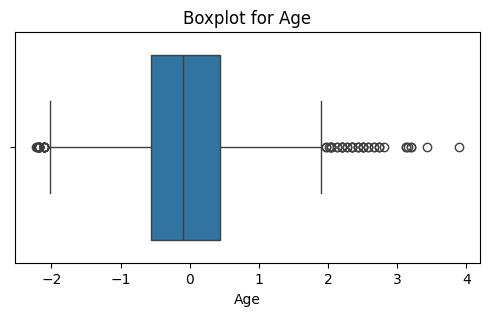

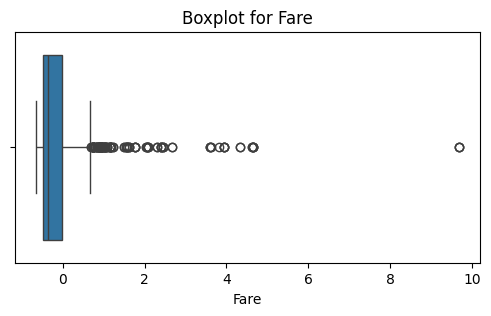

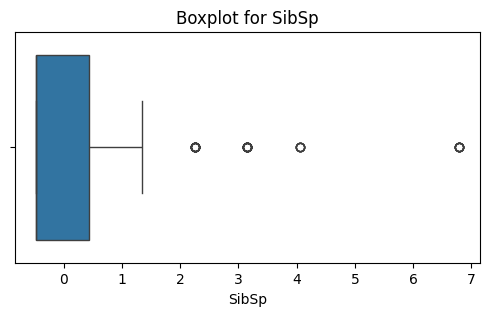

In [52]:

num_cols = ['Age', 'Fare', 'SibSp',]


for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [53]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]


In [54]:
for col in num_cols:
    df = remove_outliers(df, col)


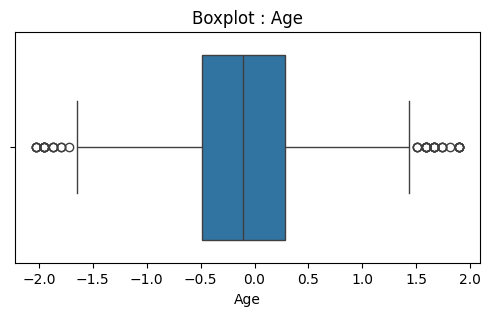

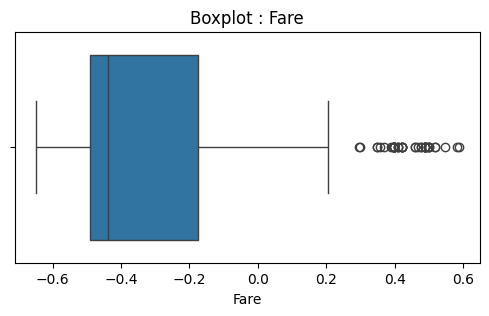

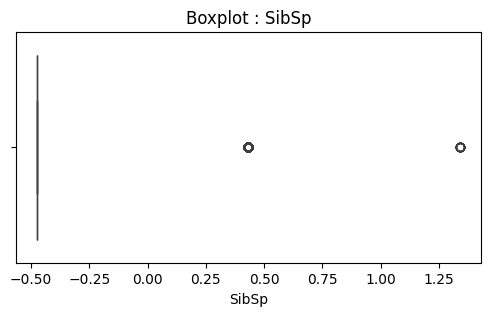

In [55]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot : {col}')
    plt.show()
